# Strategy Backtesting

## Load Saved Data

In [ ]:
import pandas as pd
import joblib
import numpy as np
import os 
import sys

sys.path.append(os.path.abspath("../"))
from src.core.backtesting import get_benchmark_returns, simulate_strategy, calculate_performance

# Load pre-saved data
optimal_weights = joblib.load('../data/backtesting/optimal_weights.pkl')
prices = pd.read_csv('../data/backtesting/asset_prices.csv', 
                    index_col='Date', parse_dates=True)
print("data loaded succesfully✅")

data loaded succesfully✅


# Benchmark Definition

In [ ]:
benchmark_returns = get_benchmark_returns(prices['2024-08-01':'2025-07-31'])
print("Bench mark created")
print(benchmark_returns.head())

Bench mark created
Date
2024-08-02   -0.006604
2024-08-05   -0.017851
2024-08-06    0.003057
2024-08-07   -0.004985
2024-08-08    0.013273
dtype: float64


In [ ]:
optimal_weight = {
    "TSLA": optimal_weights["TSLA"],
    "BND": optimal_weights["BND"],
    "SPY": optimal_weights["SPY"]
}

# simulate the strategy
strategy_returns = simulate_strategy(
    prices[['TSLA', 'SPY', 'BND']], 
    optimal_weight
)
print(strategy_returns[-270:])

Date
2024-07-18    0.000000
2024-07-19    0.000000
2024-07-22    0.000000
2024-07-23    0.000000
2024-07-24    0.000000
                ...   
2025-07-24   -0.005299
2025-07-25    0.005047
2025-07-28    0.000739
2025-07-29    0.001078
2025-07-30   -0.002312
Length: 270, dtype: float64


C:\Users\adoni\AppData\Local\Temp\ipykernel_40572\516050135.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for date in pd.date_range(start='2024-08-01', end='2025-07-31', freq=rebalance_freq):


# Performance Analysis
## Metrics Calculation

In [ ]:
benchmark_metrics = calculate_performance(benchmark_returns.loc[pd.to_datetime("2024-08-01"):])
strategy_metrics = calculate_performance(strategy_returns.loc[pd.to_datetime("2024-08-01"):])

In [32]:
print("here are the the benchmark metrics")
print(benchmark_metrics)
print("\n " \
"here are the strategy metrics")
print(strategy_metrics)

here are the the benchmark metrics
{'Sharpe': np.float64(0.8348587621653066), 'Cumulative_Return': np.float64(0.1246793780851112)}

 here are the strategy metrics
{'Sharpe': np.float64(0.7242653622672816), 'Cumulative_Return': np.float64(0.1032860684603003)}


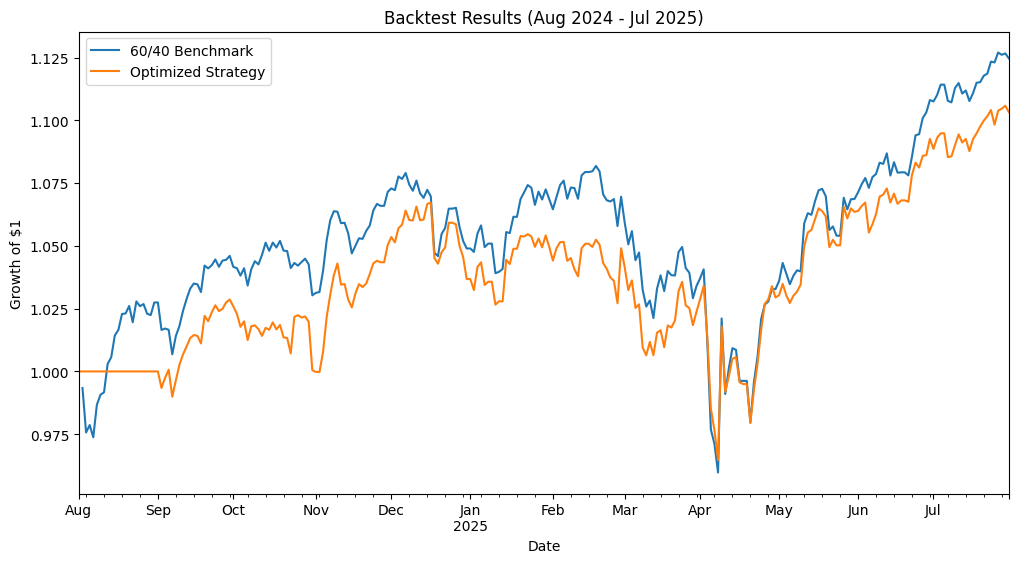

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
(1 + benchmark_returns.loc[pd.to_datetime("2024-08-01"):]).cumprod().plot(label='60/40 Benchmark')
(1 + strategy_returns.loc[pd.to_datetime("2024-08-01"):]).cumprod().plot(label='Optimized Strategy')
plt.title('Backtest Results (Aug 2024 - Jul 2025)')
plt.ylabel('Growth of $1')
plt.legend()
plt.show()

## Strategy vs Benchmark Performance (Aug 2024 – Jul 2025)

### 🔹 Visual Insights
- The optimized strategy closely tracks the 60/40 benchmark throughout the year.
- Both portfolios experience a sharp drawdown around March–April 2025, with the benchmark recovering slightly faster.
- Overall, the benchmark ends with a higher cumulative return, but the gap remains modest.

### 🔹 Statistical Comparison
| Metric              | Benchmark | Strategy | Difference |
|---------------------|-----------|----------|------------|
| **Cumulative Return** | 12.47%    | 10.33%   | −2.14%     |
| **Sharpe Ratio**      | 0.835     | 0.724    | −0.111     |

### ✅ Interpretation
- The performance difference between the benchmark and the optimized strategy is **not large**.
- The strategy achieves a **respectable Sharpe ratio** and maintains similar growth dynamics.
- With **further tuning**, the strategy has potential to **match or exceed** the benchmark in both return and risk-adjusted performance.